In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

(CVXPY) Oct 10 10:40:49 AM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Problem description
section 4.1 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [2]:
ms = [20,30,40,25,35]
ns = [30,40,25,35,20]
params = ob.sc_params(ms, ns)

# Distributed solution

In [3]:
agents = ob.sc_agents(params)
g = ob.sc_coupling(params, agents)
prob = ob.Problem(agents = agents, g = g)

In [4]:
x_agent, x_global = prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=150)

k=0, rel_gap=inf, L=-2668.373870159401, U=4645.946857834253
k=1, rel_gap=inf, L=-1659.6770342803075, U=4645.946857834253
k=2, rel_gap=inf, L=-1613.4492090729304, U=2410.035887824023
k=3, rel_gap=inf, L=-1539.5312200939852, U=1914.0226571918038
k=4, rel_gap=inf, L=-1007.5185699477861, U=930.6318905307726
k=5, rel_gap=inf, L=-914.0744909321579, U=930.6318905307726
k=6, rel_gap=inf, L=-817.4777533898814, U=515.549944247128
k=7, rel_gap=inf, L=-763.1845362745662, U=147.26521758446052
k=8, rel_gap=inf, L=-665.320385261813, U=147.26521758446052
k=9, rel_gap=inf, L=-633.3068623554302, U=55.73662671881982
k=10, rel_gap=inf, L=-510.2741628657159, U=55.73662671881982
k=11, rel_gap=inf, L=-389.63711616238515, U=35.37866517777877
k=12, rel_gap=3.412174604053498, L=-362.01843761940404, U=-82.04988925116766
k=13, rel_gap=3.2383596502030554, L=-347.7569399057784, U=-82.04988925116766
k=14, rel_gap=2.745695325961507, L=-307.333886663758, U=-82.04988925116766
k=15, rel_gap=1.8979181241329761, L=-293.56

/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:1358: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=79, rel_gap=0.028758060151046694, L=-139.6777496291154, U=-135.7731764537595
k=80, rel_gap=0.028345528296932834, L=-139.621738868894, U=-135.7731764537595
k=81, rel_gap=0.027795858825812245, L=-139.5471084988003, U=-135.7731764537595
k=82, rel_gap=0.027537979097541666, L=-139.51209534894997, U=-135.7731764537595
k=83, rel_gap=0.026580542531426138, L=-139.38210114511548, U=-135.7731764537595
k=84, rel_gap=0.026113863444055373, L=-139.3187386430386, U=-135.7731764537595
k=85, rel_gap=0.024627855107533316, L=-139.18697819048225, U=-135.8414935692674
k=86, rel_gap=0.023348106281898227, L=-139.01313519861446, U=-135.8414935692674
k=87, rel_gap=0.022400011872085172, L=-138.88434463794079, U=-135.8414935692674
k=88, rel_gap=0.022198764960178186, L=-138.85700695685114, U=-135.8414935692674
k=89, rel_gap=0.021467897973837927, L=-138.7577248938262, U=-135.8414935692674
k=90, rel_gap=0.02110511751214187, L=-138.7478425459094, U=-135.88007754183013
k=91, rel_gap=0.019685698158791103, L=-138.5760

/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:154: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


k=143, rel_gap=0.002317823114352982, L=-136.274835173165, U=-135.95970462715957
k=144, rel_gap=0.002221815188212984, L=-136.26178196388514, U=-135.95970462715957
k=145, rel_gap=0.0021826607541567122, L=-136.256458538596, U=-135.95970462715957
k=146, rel_gap=0.002157819295356448, L=-136.25620071912863, U=-135.96281752801565
k=147, rel_gap=0.0021233703302013275, L=-136.2515169407652, U=-135.96281752801565
k=148, rel_gap=0.002101659450635444, L=-136.24856506840842, U=-135.96281752801565
k=149, rel_gap=0.0020763855090941983, L=-136.24512875210644, U=-135.96281752801565


# Centralized solution

In [5]:
h_cvx, x_cvx, prob_cvx = ob.cvx_supply_chain(params=params)

In [6]:
h_cvx, prob.upper_bnd[-1]

(-135.96540577983956, -135.96281752801565)

# Plot

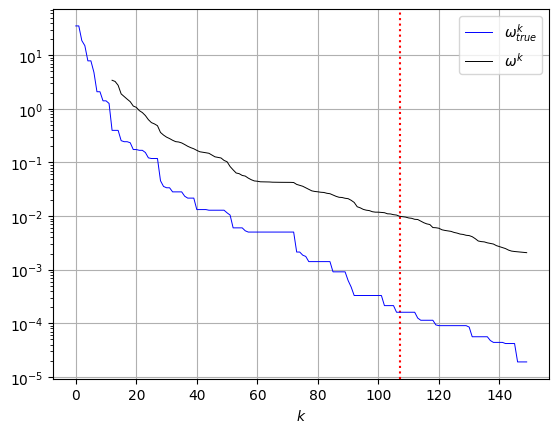

In [7]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx)